# Adidas Web Store Data Analysis

In this project, Data Analysis has been performed on three datasets related to Adidas Shoes. The primary goal is to combine the datasets and investigate the pricing differences across various countries, focusing on the average price variation by shoe category and country.

The analysis aims to uncover insights into the pricing trends for Adidas shoes, with a specific emphasis on how prices differ based on shoe categories and the countries represented in the datasets. By merging the data, I walked through some steps to get to the desired dataset.

In [1]:
import pandas as pd #import the Pandas Library

In [2]:
# Reading the first dataset which has infromation about the country code and the currency 
country = pd.read_csv('country_dim.csv') 
country.head()

,country_code,currency,shoe_metric
0,DE,euro,eu
1,US,usd,usa
2,BE,euro,eu
3,UK,pounds,uk


In [3]:
country.drop(columns=['shoe_metric'], inplace=True) # dropping the shoe_metric column

In [4]:
country.head()

,country_code,currency
0,DE,euro
1,US,usd
2,BE,euro
3,UK,pounds


In [5]:
# Reading the second dataset which has infromation about the shoes fact
shoe_fact = pd.read_csv('shoes_fact.csv')
shoe_fact

,Unnamed: 0,id,price,category,size,availability,date,country_code
0,63575,HP9426,60.0,sneakers,36,0,07/01/2025,DE
1,63576,HP9426,60.0,sneakers,36 2/3,0,07/01/2025,DE
2,63577,HP9426,60.0,sneakers,37 1/3,0,07/01/2025,DE
3,63578,HP9426,60.0,sneakers,38,0,07/01/2025,DE
4,63579,HP9426,60.0,sneakers,38 2/3,1,07/01/2025,DE
...,...,...,...,...,...,...,...,...
299151,847278,JI4476,160.0,sneakers,47 1/3,3,2025-01-16,BE
299152,847279,JI4476,160.0,sneakers,48,0,2025-01-16,BE
299153,847280,JI4476,160.0,sneakers,48 2/3,0,2025-01-16,BE
299154,847281,JI4476,160.0,sneakers,49 1/3,2,2025-01-16,BE


In [6]:
# dropping the unnecessary columns specifically 'shoe_metric', "Unnamed: 0", "availability", "date", and "size
shoe_fact.drop(columns=['Unnamed: 0','size','availability','date'],inplace=True)
shoe_fact

,id,price,category,country_code
0,HP9426,60.0,sneakers,DE
1,HP9426,60.0,sneakers,DE
2,HP9426,60.0,sneakers,DE
3,HP9426,60.0,sneakers,DE
4,HP9426,60.0,sneakers,DE
...,...,...,...,...
299151,JI4476,160.0,sneakers,BE
299152,JI4476,160.0,sneakers,BE
299153,JI4476,160.0,sneakers,BE
299154,JI4476,160.0,sneakers,BE


In [7]:
shoe_fact.id.duplicated().sum()

297146

In [8]:
shoe_fact = shoe_fact.drop_duplicates(subset=['id','country_code'],keep="first")
shoe_fact

,id,price,category,country_code
0,HP9426,60.0,sneakers,DE
20,HQ4199,180.0,sneakers,DE
36,JQ2552,160.0,sneakers,DE
58,JI1896,80.0,sneakers,DE
80,IE8976,180.0,sneakers,DE
...,...,...,...,...
289291,IF4212,144.0,athletic_sneakers,US
289337,IE6438,50.0,athletic_sneakers,US
289456,H02334,110.0,athletic_sneakers,US
291675,IF1360,70.0,occer-shoes,US


In [9]:
shoe_fact.country_code.unique()

array(['DE', 'UK', 'BE', 'US'], dtype=object)

In [10]:
shoe_fact.duplicated().any()

False

# Merging of the Shoe Fact and Country Data Set

In [11]:
# Merging the two datasets i.e. Country and Shoes Fact
country_shoes_fact = pd.merge(shoe_fact,country, on='country_code', how='left')
country_shoes_fact

,id,price,category,country_code,currency
0,HP9426,60.0,sneakers,DE,euro
1,HQ4199,180.0,sneakers,DE,euro
2,JQ2552,160.0,sneakers,DE,euro
3,JI1896,80.0,sneakers,DE,euro
4,IE8976,180.0,sneakers,DE,euro
...,...,...,...,...,...
3398,IF4212,144.0,athletic_sneakers,US,usd
3399,IE6438,50.0,athletic_sneakers,US,usd
3400,H02334,110.0,athletic_sneakers,US,usd
3401,IF1360,70.0,occer-shoes,US,usd


In [12]:
#Converting currency for standardization to Euros:

country_shoes_fact['currency'].unique()


array(['euro', 'pounds', 'usd'], dtype=object)

In [13]:
#In order to standardize the data for the analysis, 
#I decide to convert all 'price' data to Euro (therefore converting other currencies such as $ and £ to EUR).

def convert_euros(df):
    if df.currency =='euro':
        return df.price
    if df.currency=='pounds':
        return df.price*0.85
    if df.currency=='usd':
        return df.price*1.03
    else:
        raise ValueError(f"Currency not recognized:{df.currency}")

country_shoes_fact['Prices in Euros']= country_shoes_fact.apply(convert_euros, axis=1)

In [14]:
country_shoes_fact

,id,price,category,country_code,currency,Prices in Euros
0,HP9426,60.0,sneakers,DE,euro,60.00
1,HQ4199,180.0,sneakers,DE,euro,180.00
2,JQ2552,160.0,sneakers,DE,euro,160.00
3,JI1896,80.0,sneakers,DE,euro,80.00
4,IE8976,180.0,sneakers,DE,euro,180.00
...,...,...,...,...,...,...
3398,IF4212,144.0,athletic_sneakers,US,usd,148.32
3399,IE6438,50.0,athletic_sneakers,US,usd,51.50
3400,H02334,110.0,athletic_sneakers,US,usd,113.30
3401,IF1360,70.0,occer-shoes,US,usd,72.10


In [15]:
country_shoes_fact.drop(columns=['price','currency'], inplace=True)

In [16]:
country_shoes_fact

,id,category,country_code,Prices in Euros
0,HP9426,sneakers,DE,60.00
1,HQ4199,sneakers,DE,180.00
2,JQ2552,sneakers,DE,160.00
3,JI1896,sneakers,DE,80.00
4,IE8976,sneakers,DE,180.00
...,...,...,...,...
3398,IF4212,athletic_sneakers,US,148.32
3399,IE6438,athletic_sneakers,US,51.50
3400,H02334,athletic_sneakers,US,113.30
3401,IF1360,occer-shoes,US,72.10


In [17]:
country_shoes_fact.rename(columns={"country_code": 'country'}, inplace= True)

In [18]:
country_shoes_fact

,id,category,country,Prices in Euros
0,HP9426,sneakers,DE,60.00
1,HQ4199,sneakers,DE,180.00
2,JQ2552,sneakers,DE,160.00
3,JI1896,sneakers,DE,80.00
4,IE8976,sneakers,DE,180.00
...,...,...,...,...
3398,IF4212,athletic_sneakers,US,148.32
3399,IE6438,athletic_sneakers,US,51.50
3400,H02334,athletic_sneakers,US,113.30
3401,IF1360,occer-shoes,US,72.10


In [19]:
# Reading the shoes dimenions third dataset 

shoes_dim = pd.read_csv('shoes_dim.csv')

In [20]:
shoes_dim

,id,name,best_for_wear,gender,image_url,dominant_color,sub_color1,sub_color2
0,HP9426,Breaknet 2.0 Schuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Cloud White
1,HQ4199,Ultraboost 1.0 Laufschuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Core Black,Core Black,Beam Green
2,JQ2552,Adizero Boston 12 Laufschuh,Racing,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Lucid Red
3,JI1896,NY 90 Schuh,Neutral,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Cloud White,Crystal White
4,IE8976,Ultraboost 1.0 Laufschuh,Neutral,U,"https://assets.adidas.com/images/w_600,f_auto,...",Grey One,Grey Three,Grey One
...,...,...,...,...,...,...,...,...
3297,IF4212,Chris Nikic Adizero Boston 12 Wide Shoes,Race,U,"https://assets.adidas.com/images/w_600,f_auto,...",Screaming Orange,Cloud White,Bright Blue
3298,IE6438,Run 60s Shoes Kids,Walking,K,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Collegiate Green,Collegiate Gold
3299,H02334,NMD_R1 Refined Shoes,Comfort,K,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Cloud White,Grey One
3300,IF1360,F50 Pro Firm Ground Cleats Kids,Outside,K,"https://assets.adidas.com/images/w_600,f_auto,...",Turbo,Aurora Black,Platinum Metallic


In [21]:
shoes_dim.drop(columns=['best_for_wear','image_url','sub_color1','sub_color2'], inplace=True)
shoes_dim

,id,name,gender,dominant_color
0,HP9426,Breaknet 2.0 Schuh,U,Cloud White
1,HQ4199,Ultraboost 1.0 Laufschuh,U,Core Black
2,JQ2552,Adizero Boston 12 Laufschuh,U,Cloud White
3,JI1896,NY 90 Schuh,U,Cloud White
4,IE8976,Ultraboost 1.0 Laufschuh,U,Grey One
...,...,...,...,...
3297,IF4212,Chris Nikic Adizero Boston 12 Wide Shoes,U,Screaming Orange
3298,IE6438,Run 60s Shoes Kids,K,Cloud White
3299,H02334,NMD_R1 Refined Shoes,K,Cloud White
3300,IF1360,F50 Pro Firm Ground Cleats Kids,K,Turbo


In [22]:
shoes_dim.id.duplicated().any()

True

In [23]:
shoes_dim = shoes_dim.drop_duplicates(subset=['id'], keep="first")
shoes_dim

,id,name,gender,dominant_color
0,HP9426,Breaknet 2.0 Schuh,U,Cloud White
1,HQ4199,Ultraboost 1.0 Laufschuh,U,Core Black
2,JQ2552,Adizero Boston 12 Laufschuh,U,Cloud White
3,JI1896,NY 90 Schuh,U,Cloud White
4,IE8976,Ultraboost 1.0 Laufschuh,U,Grey One
...,...,...,...,...
3297,IF4212,Chris Nikic Adizero Boston 12 Wide Shoes,U,Screaming Orange
3298,IE6438,Run 60s Shoes Kids,K,Cloud White
3299,H02334,NMD_R1 Refined Shoes,K,Cloud White
3300,IF1360,F50 Pro Firm Ground Cleats Kids,K,Turbo


In [24]:
shoes_dim.duplicated().any()

False

In [25]:
shoes_info = shoes_dim.groupby(['id', 'gender']).agg(
    {
        'name': 'last',   
        'dominant_color': 'first'
    }
).reset_index()

In [26]:
shoes_info

,id,gender,name,dominant_color
0,011040,U,World Cup Fußballschuh,Black
1,015110,U,Copa Mundial Fußballschuh,Black
2,019228,U,Mundial Team Fußballschuh,Black
3,019310,U,Mundial Goal Schuh,Core Black
4,033200,U,Kaiser 5 Cup Fußballschuh,Black
...,...,...,...,...
2005,JS3050,M,Adizero Impact Turf Silver Speed Baseball Shoes,Silver Metallic
2006,JS3083,K,Texas Tech x Mahomes Ultrarun 5 Shoes Kids,Team Power Red 2
2007,JS3222,M,Equipment Edge Runner 1 Shoes,Crystal White
2008,Q47235,M,Tracefinder Trailrunning-Schuh,Core Black


In [27]:
shoes_info['name']= shoes_info['name'].str.replace('Fußballschuh','FootBall Shoes')
shoes_info['name']= shoes_info['name'].str.replace('-Schuh',' Shoes')
shoes_info['name']= shoes_info['name'].str.replace('Laufschuh', 'Shoes')
shoes_info['name']= shoes_info['name'].str.replace('Schuh','Shoes')

In [28]:
shoes_info

,id,gender,name,dominant_color
0,011040,U,World Cup FootBall Shoes,Black
1,015110,U,Copa Mundial FootBall Shoes,Black
2,019228,U,Mundial Team FootBall Shoes,Black
3,019310,U,Mundial Goal Shoes,Core Black
4,033200,U,Kaiser 5 Cup FootBall Shoes,Black
...,...,...,...,...
2005,JS3050,M,Adizero Impact Turf Silver Speed Baseball Shoes,Silver Metallic
2006,JS3083,K,Texas Tech x Mahomes Ultrarun 5 Shoes Kids,Team Power Red 2
2007,JS3222,M,Equipment Edge Runner 1 Shoes,Crystal White
2008,Q47235,M,Tracefinder Trailrunning Shoes,Core Black


## Final Merging - First Merge + Shoes_info

In [29]:
adidas_shoes_df = pd.merge(country_shoes_fact, shoes_info, on= 'id', how='inner')

In [30]:
adidas_shoes_df

,id,category,country,Prices in Euros,gender,name,dominant_color
0,HP9426,sneakers,DE,60.00,U,Breaknet 2.0 Shoes,Cloud White
1,HP9426,sneakers,UK,42.50,U,Breaknet 2.0 Shoes,Cloud White
2,HP9426,sneakers,BE,60.00,U,Breaknet 2.0 Shoes,Cloud White
3,HQ4199,sneakers,DE,180.00,U,Ultraboost 1.0 Shoes,Core Black
4,HQ4199,sneakers,UK,136.00,U,Ultraboost 1.0 Shoes,Core Black
...,...,...,...,...,...,...,...
3398,IF4212,athletic_sneakers,US,148.32,U,Chris Nikic Adizero Boston 12 Wide Shoes,Screaming Orange
3399,IE6438,athletic_sneakers,US,51.50,K,Run 60s Shoes Kids,Cloud White
3400,H02334,athletic_sneakers,US,113.30,K,NMD_R1 Refined Shoes,Cloud White
3401,IF1360,occer-shoes,US,72.10,K,F50 Pro Firm Ground Cleats Kids,Turbo


In [31]:
adidas_shoes_df.duplicated().any()

False

In [32]:
adidas_shoes_df.category.value_counts()

sneakers                1023
running-shoes            711
us/athletic_sneakers     591
outdoor-shoes            556
tennis-shoes             144
us/soccer-shoes          102
gym_training-shoes        88
us/workout-shoes          54
football-shoes            48
us/walking-shoes          27
us/running-shoes          24
us/tennis-shoes           17
athletic_sneakers          8
us/hiking-shoes            5
walking-shoes              3
occer-shoes                2
Name: category, dtype: int64

In [33]:
#The variable names are stored in a disorganized manner.
#I will update the 'category' column to accurately reflect the shoe types.

adidas_shoes_df['category'] = adidas_shoes_df['category'].replace({
    'occer-shoes' : 'football-shoes',
    'us/tennis-shoes' : 'tennis-shoes',
    'us/running-shoes' : 'running-shoes',
    'us/hiking-shoes' : 'hiking-shoes',
    'us/walking-shoes' : 'walking-shoes',
    'us/workout-shoes' : 'gym_training-shoes',
    'us/soccer-shoes' : 'football-shoes',
    'us/athletic_sneakers' : 'athletic_sneakers'
})

adidas_shoes_df.category.value_counts()

sneakers              1023
running-shoes          735
athletic_sneakers      599
outdoor-shoes          556
tennis-shoes           161
football-shoes         152
gym_training-shoes     142
walking-shoes           30
hiking-shoes             5
Name: category, dtype: int64

In [34]:
adidas_shoes_df.columns

Index(['id', 'category', 'country', 'Prices in Euros', 'gender', 'name',
       'dominant_color'],
      dtype='object')

## Distribution of Targated Variable Price

In [35]:
import matplotlib.pyplot as plt

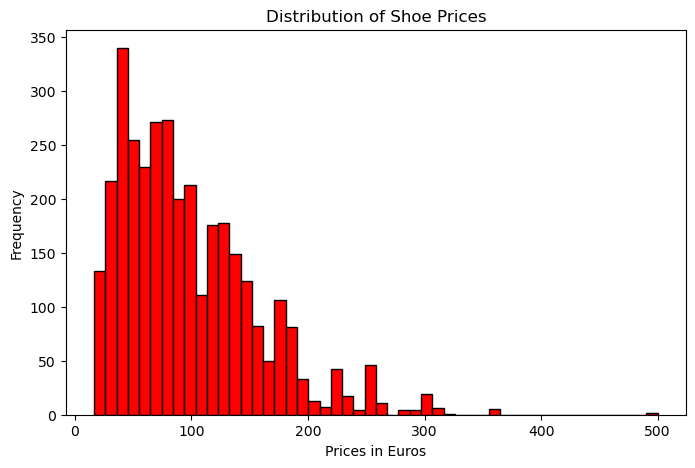

In [36]:
plt.figure(figsize = (8,5))
plt.hist(adidas_shoes_df['Prices in Euros'], bins = 50, edgecolor='black', color = 'red')
plt.xlabel('Prices in Euros')
plt.ylabel('Frequency')
plt.title('Distribution of Shoe Prices')
plt.show()

## Statistics Using Python

In [37]:
from scipy.stats.mstats import normaltest
statistics, pvalue = normaltest(adidas_shoes_df['Prices in Euros'])

print(f"Test Statistic:{statistics}")
print(f"Test pvalue:{pvalue}")



Test Statistic:742.9104524197614
Test pvalue:4.775787372744617e-162


In [38]:
if pvalue < 0.05:
    print("The data does not follow a normal distribution (reject H0).")
else:
    print("The data follows a normal distribution (cannot reject H0).")

The data does not follow a normal distribution (reject H0).


The variable 'price', as already observed in the graph and later confirmed by the normality test, 
does not follow a normal distribution and is skewed to the right. 
Moving forward within the scope of Analysis, we aim to visualize how price varies based on different features: 
specifically, by country and shoe category. It is worth noting that the 'category' variable in the UK only includes the 'sneakers' instance.

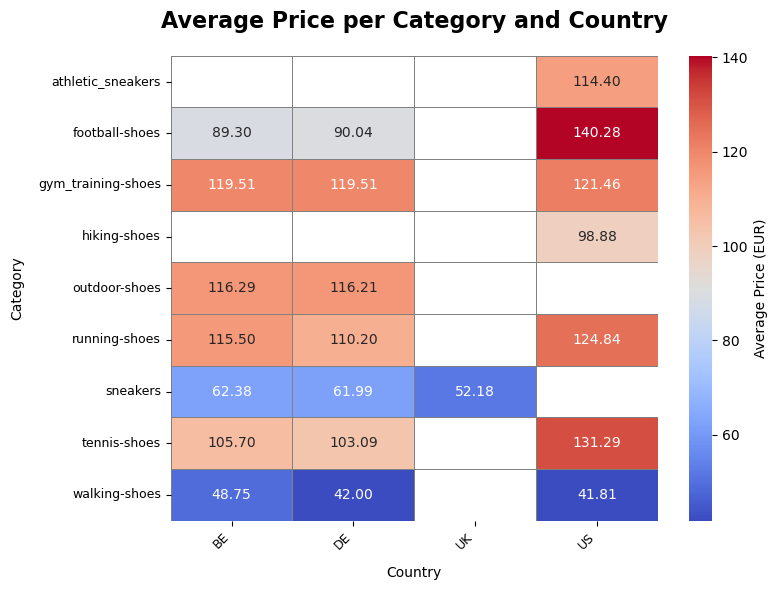

In [39]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
category_country_prices = adidas_shoes_df.groupby(['category', 'country'])['Prices in Euros'].mean().unstack()

plt.figure(figsize=(8, 6))
sns.heatmap(
    category_country_prices,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Average Price (EUR)'}
)
plt.title('Average Price per Category and Country', fontsize=16, weight='bold', pad=20) 
plt.xlabel('Country', fontsize=10, labelpad=10) 
plt.ylabel('Category', fontsize=10, labelpad=10) 
plt.xticks(rotation=45, ha='right', fontsize=9) 
plt.yticks(fontsize=9)  
plt.tight_layout() 
plt.show()

It is interesting to note that prices tend to be higher in the United States compared to European countries, particularly for football shoes (possibly due to the lower popularity of this sport overseas), and tennis shoes.

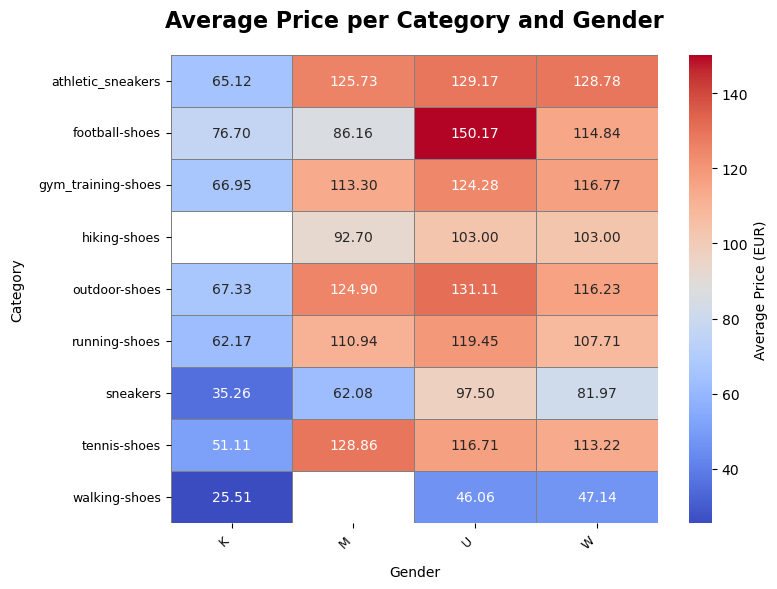

In [40]:
category_gender_prices = adidas_shoes_df.groupby(['category', 'gender'])['Prices in Euros'].mean().unstack()

plt.figure(figsize=(8, 6))
sns.heatmap(
    category_gender_prices,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Average Price (EUR)'}
)
plt.title('Average Price per Category and Gender', fontsize=16, weight='bold', pad=20) 
plt.xlabel('Gender', fontsize=10, labelpad=10) 
plt.ylabel('Category', fontsize=10, labelpad=10) 
plt.xticks(rotation=45, ha='right', fontsize=9) 
plt.yticks(fontsize=9)  
plt.tight_layout() 
plt.show()

It is interesting to note that prices tend to be higher in the Unisex Gender particularly for football shoes.

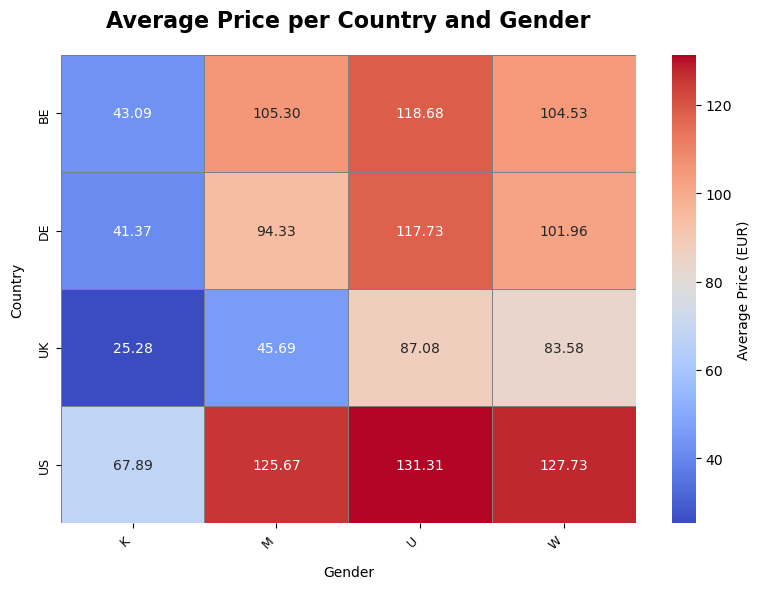

In [41]:
country_gender_prices = adidas_shoes_df.groupby(['country', 'gender'])['Prices in Euros'].mean().unstack()

plt.figure(figsize=(8, 6))
sns.heatmap(
    country_gender_prices,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Average Price (EUR)'}
)
plt.title('Average Price per Country and Gender', fontsize=16, weight='bold', pad=20) 
plt.xlabel('Gender', fontsize=10, labelpad=10) 
plt.ylabel('Country', fontsize=10, labelpad=10) 
plt.xticks(rotation=45, ha='right', fontsize=9) 
plt.yticks(fontsize=9)  
plt.tight_layout() 
plt.show()

It is interesting to note that prices tend to be higher in the United States compared to European countries for all the Gender category.

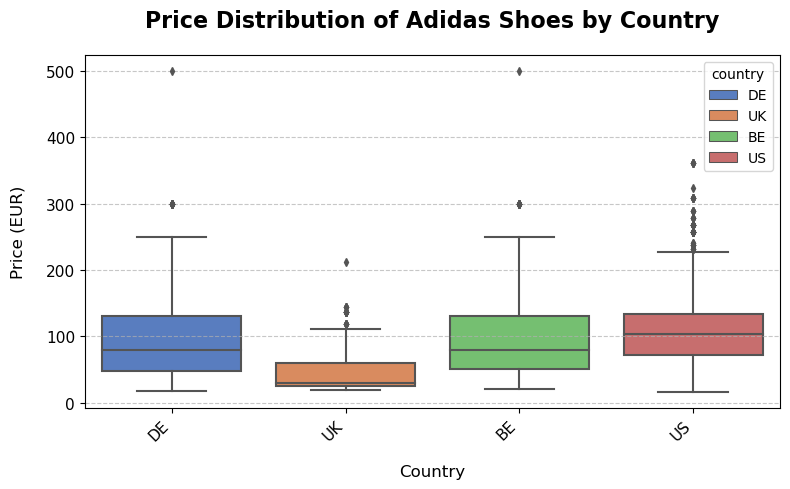

In [42]:
plt.figure(figsize=(8, 5))

sns.boxplot(
    x='country', 
    y='Prices in Euros', 
    data=adidas_shoes_df, 
    palette="muted",
    hue='country', 
    linewidth=1.5,
    dodge=False,
    fliersize=4
)

plt.title(
    'Price Distribution of Adidas Shoes by Country', 
    fontsize=16, 
    weight='bold', 
    pad=20
)

plt.xlabel('Country', fontsize=12, labelpad=15)
plt.ylabel('Price (EUR)', fontsize=12, labelpad=15)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

At first glance, it appears that shoe prices in the US tend to be higher compared to other overseas countries. Notably, the UK includes only one category of shoes, namely 'sneaker shoes.' Meanwhile, BE and DE exhibit a similar pricing pattern, with outliers distributed relatively homogeneously within their respective trends.

In order to test these hypothesis we can conduct the ANOVA Analysis.

## ANOVA Analysis - To test the prices of shoes based on the countries in the above graph

The ANOVA (Analysis of Variance) test compares the variability within each group (country) to the variability between the groups. ANOVA will be used to determine whether there are statistically significant differences in the mean shoe prices among the four countries. 
If the p-value is below a chosen significance level (0.05), it indicates that at least one country has a mean price that significantly differs from the others. However, it does not specify which countries differ; to see that additional post-hoc will provide for that.

F-statistic: 63.70
P-value: 0.0000
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
    BE     DE  -3.2258 0.5133  -9.2429   2.7913  False
    BE     UK  -44.083    0.0 -56.9167 -31.2493   True
    BE     US  20.0258    0.0  13.2418  26.8099   True
    DE     UK -40.8572    0.0 -53.5546 -28.1599   True
    DE     US  23.2516    0.0  16.7292   29.774   True
    UK     US  64.1089    0.0  51.0307  77.1871   True
------------------------------------------------------


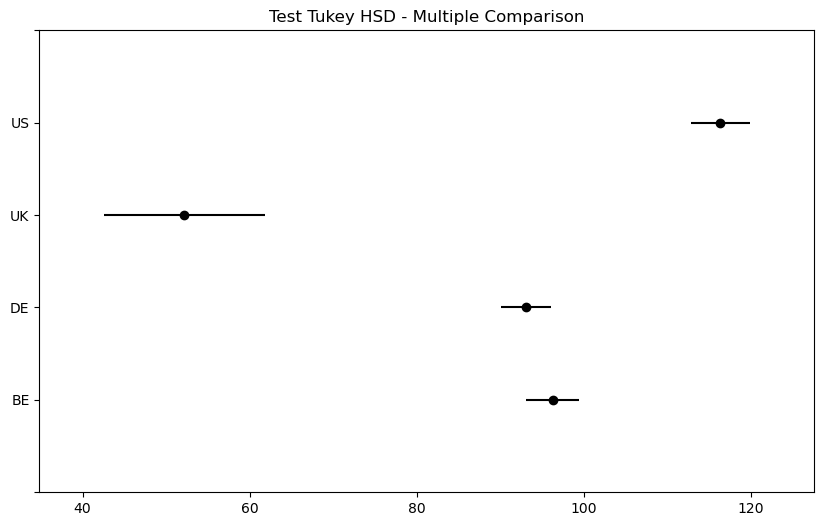

In [43]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ANOVA
groups = [group['Prices in Euros'].values for _, group in adidas_shoes_df.groupby('country')]
anova_result = f_oneway(*groups)
print(f"F-statistic: {anova_result.statistic:.2f}")
print(f"P-value: {anova_result.pvalue:.4f}")

# Test Tukey HSD
tukey = pairwise_tukeyhsd(endog=adidas_shoes_df['Prices in Euros'], groups=adidas_shoes_df['country'], alpha=0.05)
print(tukey)
tukey.plot_simultaneous()
plt.title("Test Tukey HSD - Multiple Comparison")
plt.show()

Based on the ANOVA test and, subsequently, the Tukey HSD test, no significant differences were found between BE and DE, both of which exhibit similar prices across the reported categories. This is not the case for the US, which, as shown in the graph and indicated by the p-value from the test, has a higher average shoe price compared to the other countries. The analysis also reveals statistically significant differences between most group pairs except BE vs DE, where their mean difference is not significant. This suggests that most groups have distinct mean values, except for BE and DE, which are similar.